In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss, confusion_matrix, log_loss, accuracy_score, zero_one_loss
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [24]:
df = pd.read_csv('data.csv', index_col='Unnamed: 0')
print(df.shape, df.columns)
df.head(3)

(648, 21) Index(['name', 'tempo', 'beats', 'chroma_stft', 'rmse', 'spec_cent', 'spec_bw',
       'rolloff', 'zcr', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'label'],
      dtype='object')


,name,tempo,beats,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc_1,...,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,label
0,Amilcare Ponchielli - Dance of the Hours.mp3,130.813953,394,0.292340,0.042382,1637.235974,2228.712920,2925.815507,0.038808,164.360115,...,4.918759,4.767190,3.798379,-2.531283,-0.907902,-2.287565,0.083561,-2.888623,-3.455121,Classical
1,Rossini - William Tell Overture - Final.mp3,160.714286,443,0.388742,0.057814,1357.984086,1875.937831,2628.860882,0.028938,165.760189,...,22.165190,5.195708,9.989042,-3.362946,3.713702,-3.914152,-1.442259,-3.176913,-2.756510,Classical
2,Jean Sibelius - Finlandia.mp3,139.674831,364,0.395700,0.044656,1695.655814,2091.846492,3243.376221,0.043351,167.199168,...,9.633350,2.786427,4.010491,-8.536038,0.308073,-8.201940,-5.903670,-3.534558,-4.193664,Classical


In [25]:
X = df.drop(['name', 'label'], axis=1).astype(float)
genre_map = {genre:i for i, genre in enumerate(df.label.unique())}
y = df.label.map(genre_map)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
logreg = LogisticRegression(n_jobs=-1, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
pred_probas = logreg.predict_proba(X_test_scaled)
logreg_preds = logreg.predict(X_test_scaled)

{'Classical': 0, 'Electronic': 1, 'Metal': 2, 'Hip_Hop': 3, 'Country': 4, 'Jazz': 5}
[[19  0  0  0  0  2]
 [ 0 10  0  5  0  1]
 [ 0  0 22  1  2  1]
 [ 0  4  1 15  1  0]
 [ 0  3  1  1 15  2]
 [ 2  0  0  1  4 17]]


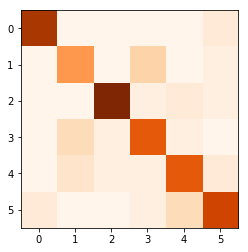

In [30]:
plt.imshow(confusion_matrix(y_test, logreg_preds), cmap='Oranges')
print(genre_map)
print(confusion_matrix(y_test, logreg_preds))

In [31]:
hamming_loss(y_test, logreg_preds)

0.24615384615384617

In [32]:
zero_one_loss(y_test, logreg_preds)

0.24615384615384617

In [33]:
bag_clf = BaggingClassifier(n_jobs=-1)
bag_clf.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [34]:
bag_preds = bag_clf.predict(X_test_scaled)

{'Classical': 0, 'Electronic': 1, 'Metal': 2, 'Hip_Hop': 3, 'Country': 4, 'Jazz': 5}
[[19  0  0  0  0  2]
 [ 0 10  1  4  0  1]
 [ 0  0 19  2  3  2]
 [ 0  4  2 11  4  0]
 [ 0  3  1  3 11  4]
 [ 1  0  1  0  2 20]]
hamming: 0.3076923076923077, zol: 0.3076923076923077


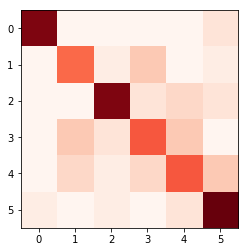

In [35]:
plt.imshow(confusion_matrix(y_test, bag_preds), cmap='Reds')
print(genre_map)
print(confusion_matrix(y_test, bag_preds))
print(f'hamming: {hamming_loss(y_test, bag_preds)}, zol: {zero_one_loss(y_test, bag_preds)}')

In [36]:
pca = PCA(n_components=4)

In [37]:
reduced_X_train = pca.fit_transform(X_train_scaled)
reduced_X_test = pca.transform(X_test_scaled)

In [38]:
gb_trees = GradientBoostingClassifier()

In [39]:
gb_trees.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [40]:
gbt_preds = gb_trees.predict(X_test_scaled)

{'Classical': 0, 'Electronic': 1, 'Metal': 2, 'Hip_Hop': 3, 'Country': 4, 'Jazz': 5}
[[17  0  0  0  0  4]
 [ 0  8  1  6  0  1]
 [ 0  0 18  2  4  2]
 [ 0  1  1 18  1  0]
 [ 0  3  2  2 13  2]
 [ 1  0  0  0  4 19]]
hamming: 0.2846153846153846, zol: 0.2846153846153846


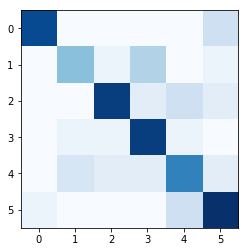

In [41]:
plt.imshow(confusion_matrix(y_test, gbt_preds), cmap='Blues')
print(genre_map)
print(confusion_matrix(y_test, gbt_preds))
print(f'hamming: {hamming_loss(y_test, gbt_preds)}, zol: {zero_one_loss(y_test, gbt_preds)}')

In [76]:
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
svc_preds = svc.predict(X_test_scaled)

{'Classical': 0, 'Electronic': 1, 'Metal': 2, 'Hip_Hop': 3, 'Country': 4, 'Jazz': 5}
[[20  0  0  0  0  1]
 [ 0 12  1  3  0  0]
 [ 0  0 18  0  4  4]
 [ 0  3  1 16  0  1]
 [ 0  3  1  1 16  1]
 [ 1  0  0  0  3 20]]
hamming: 0.2153846153846154, zol: 0.2153846153846154


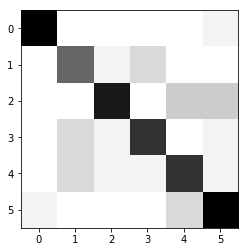

In [77]:
plt.imshow(confusion_matrix(y_test, svc_preds), cmap='gray_r')
print(genre_map)
print(confusion_matrix(y_test, svc_preds))
print(f'hamming: {hamming_loss(y_test, svc_preds)}, zol: {zero_one_loss(y_test, svc_preds)}')

In [78]:
print(genre_map)
svc_preds

{'Classical': 0, 'Electronic': 1, 'Metal': 2, 'Hip_Hop': 3, 'Country': 4, 'Jazz': 5}


array([5, 2, 2, 4, 4, 4, 5, 2, 5, 0, 3, 5, 1, 2, 3, 2, 2, 5, 1, 3, 0, 2,
       3, 1, 3, 4, 2, 3, 2, 5, 0, 4, 5, 4, 2, 4, 4, 0, 1, 5, 3, 5, 1, 2,
       5, 5, 3, 5, 4, 5, 1, 3, 0, 0, 3, 2, 2, 2, 4, 0, 1, 0, 5, 5, 0, 0,
       0, 2, 5, 3, 4, 5, 2, 4, 0, 1, 3, 3, 5, 2, 0, 4, 5, 5, 3, 3, 3, 2,
       4, 0, 1, 4, 1, 1, 1, 1, 0, 0, 0, 1, 5, 5, 4, 0, 4, 4, 0, 4, 3, 5,
       0, 0, 3, 1, 5, 1, 5, 1, 4, 2, 5, 4, 3, 1, 2, 3, 4, 5, 4, 2])

In [60]:
import pickle

In [79]:
# with open('svc_model.pkl','wb') as f:
#     pickle.dump(svc, f)